simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人|篮球|桌子|小猫
verb => 看着|坐着|听着|看见
Adj => 蓝色的|好看的|小小的
"""

In [3]:
simple_grammar2 = """
number = number number | single_number
single_number = 1|2|3|4|5|6|7|8|9|0

"""

In [4]:
import random

In [5]:
def adj(): return random.choice('蓝色的|好看的|小小的'.split('|')).split()

In [6]:
adj()

['好看的']

In [7]:
def adj_star(): return random.choice([None,adj()+adj()])

In [8]:
adj_star()

['小小的', '小小的']

In [9]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj => 蓝色的 | 好看的 |小小的
"""

In [10]:
def create_grammar(grammar_str,split='=>',line_split = '\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        #print(line)
        exp,stmt = line.split(split)
    
        grammar[exp.strip()] = [s.split()  for s in stmt.split('|')]
    return grammar

In [11]:
grammar

NameError: name 'grammar' is not defined

In [12]:
choice = random.choice
def generate(gram,target):
    if target not in gram: return target
    expaned = [generate(gram,t) for t in random.choice(gram[target])]
    '''
    tmp = []
    for e  in expaned:
        if e!='null':
            if e != '/n':
                tmp.append(e)
                
            else:
                tmp.append('\n')
                print('e=',e)
                print('tmp=',tmp)
    '''
    #print(expaned)
    return ''.join([e if e != '/n' else '\n' for e  in expaned if e!='null'] )
    

In [13]:
example_grammar = create_grammar(simple_grammar)

In [14]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐着'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [15]:
generate(gram=example_grammar,target='sentence')

'一个小猫坐着这个蓝色的桌子'

In [16]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

In [17]:
example_grammar =create_grammar(human,split='=')

In [18]:
example_grammar

{'human': [['自己', '寻找', '活动']],
 '自己': [['我'], ['俺'], ['我们']],
 '寻找': [['看看'], ['找找'], ['想找点']],
 '活动': [['乐子'], ['玩的']]}

In [19]:
generate( gram=example_grammar,target='human')

'我们找找玩的'

In [20]:
programming = """
stmt => if_exp | while_exp |assignment
assignment => var = var
if_exp => if ( var )  { /n stmt }
while_exp => while ( var )  { /n stmt  }
var => chars number
chars => char | char char
char => a | b | c | d | e
number => 1 | 2 | 3
"""

In [21]:
programming_grammar = create_grammar(programming)

In [22]:
programming_grammar

{'stmt': [['if_exp'], ['while_exp'], ['assignment']],
 'assignment': [['var', '=', 'var']],
 'if_exp': [['if', '(', 'var', ')', '{', '/n', 'stmt', '}']],
 'while_exp': [['while', '(', 'var', ')', '{', '/n', 'stmt', '}']],
 'var': [['chars', 'number']],
 'chars': [['char'], ['char', 'char']],
 'char': [['a'], ['b'], ['c'], ['d'], ['e']],
 'number': [['1'], ['2'], ['3']]}

In [23]:
print(generate( gram=programming_grammar,target='stmt'))

ce2=e3


In [24]:
import random

In [25]:
random.choice(range(100))

93

In [26]:
filename = '/Users/henry/Documents/study/学习/nlp/nlp/article_9k.txt'

In [27]:
import re

In [28]:
def tokenize(string):
    return re.findall('\w+',string)

In [29]:
#articles_clean = open(filename, 'r').readlines()

In [30]:
#print(len(articles_clean))

In [31]:
import jieba

In [32]:
def cut(string): return list(jieba.cut(string))

In [33]:
TOKEN = []
for i,line in enumerate(open(filename)):
    if i % 100 ==0:print(i)
    #print(line)
    if i > 10000: break
    TOKEN += cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4q/wn42vfys16n4b3yz7rsj8hw00000gn/T/jieba.cache


0


Loading model cost 1.426 seconds.
Prefix dict has been built succesfully.


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [36]:
print(len(TOKEN))

3693856


In [37]:
from functools import reduce

In [38]:
from operator import add,mul

In [39]:
reduce(add,[1,2,3,4,5,6,7,8])

36

In [40]:
from collections import Counter

In [41]:
words_count = Counter(TOKEN)

In [42]:
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

In [43]:
frequiences = [f for w,f in words_count.most_common(100) ]

In [44]:
frequiences

[184244,
 47370,
 36722,
 30809,
 30283,
 18711,
 15995,
 15971,
 14714,
 14448,
 14340,
 14060,
 13074,
 12568,
 12322,
 11117,
 11036,
 10477,
 10192,
 10027,
 10001,
 9530,
 9447,
 8795,
 8584,
 8537,
 8338,
 8095,
 7729,
 7658,
 7575,
 7513,
 7412,
 7339,
 7084,
 6915,
 6772,
 6703,
 6467,
 6309,
 6276,
 6245,
 6179,
 6176,
 6141,
 6090,
 5802,
 5742,
 5734,
 5615,
 5569,
 5135,
 5000,
 4840,
 4741,
 4739,
 4720,
 4704,
 4701,
 4681,
 4670,
 4654,
 4645,
 4628,
 4538,
 4422,
 4416,
 4410,
 4391,
 4373,
 4224,
 4119,
 4064,
 4026,
 4008,
 3921,
 3842,
 3818,
 3813,
 3812,
 3793,
 3684,
 3646,
 3603,
 3595,
 3560,
 3475,
 3447,
 3426,
 3411,
 3408,
 3371,
 3349,
 3343,
 3330,
 3327,
 3310,
 3295,
 3282,
 3271]

In [45]:
x  = [i for i in range(100)]

In [46]:
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt

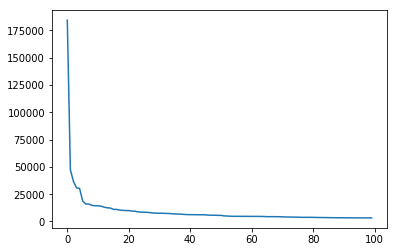

In [48]:
plt.plot(x,frequiences)

In [49]:
import numpy as np

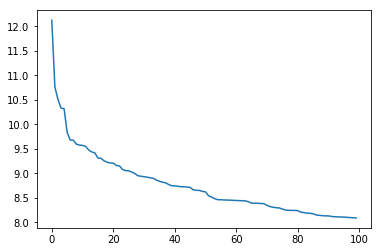

In [50]:
plt.plot(x,np.log(frequiences))

SyntaxError: invalid syntax (<ipython-input-51-bfdd1514d457>, line 1)

In [52]:
def prob_1(word):
    return words_count[word] /len(TOKEN)

In [53]:
prob_1('我们')

0.001554473157589251

In [54]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [55]:
TOKEN = [str(t) for t in TOKEN]

In [56]:
TOKEN_2_GRAM = [
    ''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))
]

In [57]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [58]:
from collections import Counter

In [59]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [60]:
words_count_2

Counter({'此外自': 2,
         '自本周': 2,
         '本周6': 3,
         '6月': 8502,
         '月12': 402,
         '12日起': 2,
         '日起除': 1,
         '除小米': 1,
         '小米手机': 4,
         '手机6': 1,
         '6等': 1,
         '等15': 18,
         '15款': 5,
         '款机型': 1,
         '机型外': 1,
         '外其余': 12,
         '其余机型': 1,
         '机型已': 1,
         '已暂停': 5,
         '暂停更新': 1,
         '更新发布': 1,
         '发布含': 1,
         '含开发': 1,
         '开发版': 1,
         '版体验版': 1,
         '体验版内测': 1,
         '内测稳定版': 1,
         '稳定版暂不受': 1,
         '暂不受影响': 1,
         '影响以': 8,
         '以确保': 19,
         '确保工程师': 1,
         '工程师可以': 1,
         '可以集中': 1,
         '集中全部': 1,
         '全部精力': 2,
         '精力进行': 1,
         '进行系统优化': 1,
         '系统优化工作': 1,
         '工作有人': 1,
         '有人猜测': 2,
         '猜测这': 2,
         '这也': 528,
         '也是': 2054,
         '是将': 41,
         '将精力': 5,
         '精力主要': 1,
         '主要用到': 1,
         '用到MIUI9': 1,
         'MIUI9的': 2,
 

In [61]:
def prob_1(word):return words_count[word] / len(TOKEN)

In [62]:
def  prob_2(word1,word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1 +word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [63]:
prob_2('我们','在')

4.683455274626447e-05

In [64]:
prob_2('在','吃饭')

2.707199580708929e-07

In [65]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i ,word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word,next_)
        sentence_pro *= probability
    return sentence_pro

In [66]:
get_probablity('小明今天抽奖抽到一台苹果手机')

6.298565169317442e-39

In [67]:
get_probablity('小明今天抽奖抽到一架波音飞机')

3.936603230823401e-40

In [68]:
get_probablity('我吃了一架飞机')

1.7531991299753616e-22

In [69]:
get_probablity('我吃了一个面包')

1.6947591589761827e-21

In [79]:
example_grammar = create_grammar(simple_grammar)

In [81]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐着'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [84]:
for sen in [ generate(gram=example_grammar,target='sentence') for i in  range(10)]:
    print('sentence:{} with Prb: {}'.format(sen,get_probablity(sen)))

sentence:一个篮球看着这个小小的桌子 with Prb: 2.908247518117989e-33
sentence:这个蓝色的好看的蓝色的好看的蓝色的桌子看着这个小猫 with Prb: 6.811057174688794e-85
sentence:这个篮球看见一个小小的好看的小小的小小的篮球 with Prb: 1.0309946177149282e-57
sentence:这个女人看着一个小小的篮球 with Prb: 1.7449485108707933e-32
sentence:一个女人看见这个好看的蓝色的桌子 with Prb: 4.4684564820130515e-49
sentence:一个篮球听着一个小小的小小的小小的篮球 with Prb: 4.777740143474698e-50
sentence:一个小猫看见一个小小的好看的小小的篮球 with Prb: 3.8083435926247585e-51
sentence:这个桌子听着一个篮球 with Prb: 4.013381575002825e-31
sentence:一个好看的好看的篮球看见这个好看的桌子 with Prb: 1.0131722754351388e-61
sentence:这个小猫看着一个女人 with Prb: 2.1485283455580413e-26


In [85]:
need_compared = [
    '今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果',
    '真事一只好看的小猫 真是一只好看的小猫',
    '今晚我去吃火锅 今晚火锅去吃我',
    '洋葱奶昔来一杯 养乐多绿来一杯'
]

for  s in need_compared:
    s1,s2 = s.split()
    p1,p2 = get_probablity(s1),get_probablity(s2)
    better = s1 if p1 >p2 else s2
    print('{} is more possible '.format(better))
    print('-'*4 + '{} with probility {}'.format(s1,p1))
    print('-'*4 + '{} with probility {}'.format(s2,p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible 
----今天晚上请你吃大餐，我们一起吃日料 with probility 1.7051133711305114e-62
----明天晚上请你吃大餐，我们一起吃苹果 with probility 1.7051133711305114e-62
真是一只好看的小猫 is more possible 
----真事一只好看的小猫 with probility 1.599536134964894e-32
----真是一只好看的小猫 with probility 5.908452950284614e-26
今晚我去吃火锅 is more possible 
----今晚我去吃火锅 with probility 8.333167524520602e-19
----今晚火锅去吃我 with probility 1.933675511002237e-25
养乐多绿来一杯 is more possible 
----洋葱奶昔来一杯 with probility 1.9840875058382383e-20
----养乐多绿来一杯 with probility 7.3289295697906e-14
